In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow
from importlib import reload
alt.renderers.enable('altair_saver', fmts=['png']);

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

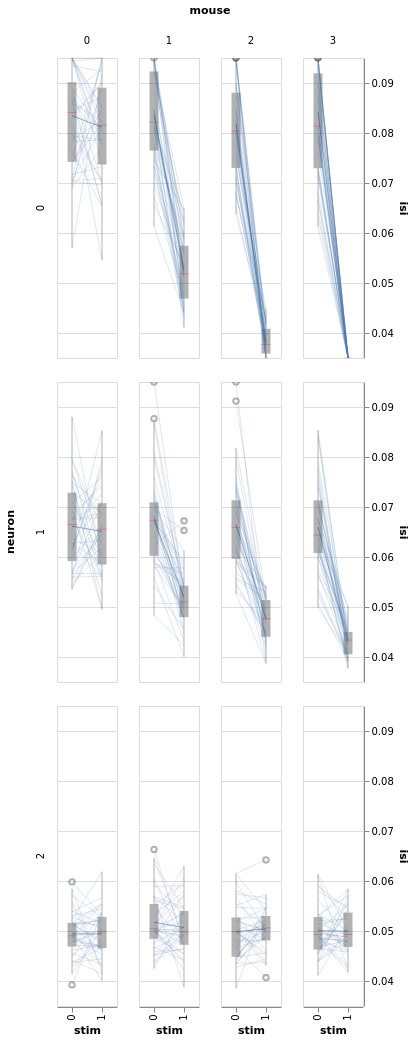

In [272]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
bw.chart_data_box_detail

In [273]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)
bw.data_and_posterior[bw.group].unique()

n(Divergences) = 3


KeyError: "None of [Index(['m0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes', 'm0bayes',\n       'm0bayes', 'm0bayes'],\n      dtype='object')] are in the [columns]"

In [222]:
self=bw

In [ ]:
self.original_data

In [247]:
self.data_and_posterior

,neuron,mouse,i_trial,combined_condition,mu_intercept_per_group higher interval,mu_intercept_per_group lower interval,mu_intercept_per_group center interval,sigma_intercept_per_group higher interval,sigma_intercept_per_group lower interval,sigma_intercept_per_group center interval,...,sigma_obs lower interval,sigma_obs center interval,sigma_slope_per_condition higher interval,sigma_slope_per_condition lower interval,sigma_slope_per_condition center interval,higher interval,lower interval,center interval,isi diff,stim
0,0,m3bayes,0,0,155.040573,19.209492,82.710077,0.00247,0.000333,0.000653,...,0.013853,0.014421,0.000767,0.000037,0.000159,-7.739457,-181.067505,-45.914378,-0.008715,0
1,0,m3bayes,1,0,155.040573,19.209492,82.710077,0.00247,0.000333,0.000653,...,0.013853,0.014421,0.000767,0.000037,0.000159,-7.739457,-181.067505,-45.914378,-0.009384,0
2,0,m3bayes,2,0,155.040573,19.209492,82.710077,0.00247,0.000333,0.000653,...,0.013853,0.014421,0.000767,0.000037,0.000159,-7.739457,-181.067505,-45.914378,0.006197,0
3,0,m3bayes,3,0,155.040573,19.209492,82.710077,0.00247,0.000333,0.000653,...,0.013853,0.014421,0.000767,0.000037,0.000159,-7.739457,-181.067505,-45.914378,-0.017528,0
4,0,m3bayes,4,0,155.040573,19.209492,82.710077,0.00247,0.000333,0.000653,...,0.013853,0.014421,0.000767,0.000037,0.000159,-7.739457,-181.067505,-45.914378,0.000351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2,m3bayes,35,2,131.439438,14.969526,69.801092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,0.005163,0
476,2,m3bayes,36,2,131.439438,14.969526,69.801092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,0.001266,0
477,2,m3bayes,37,2,131.439438,14.969526,69.801092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,-0.004094,0
478,2,m3bayes,38,2,131.439438,14.969526,69.801092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,0.005230,0


In [265]:
first_treat=self.original_data[self.treatment].unique()[0]
self.data_and_posterior[self.treatment]=first_treat# Maybe optional


data_treatment0=self.original_data[self.original_data[self.treatment]==first_treat]
# pd.concat([data_treatment0.set_index('combined_condition'), self.data_and_posterior.set_index('combined_condition')],axis=1)

levels=self.levels+[self.detail, 'combined_condition']
# levels=['combined_condition', self.detail, self.group]
#pd.concat([data_treatment0.set_index(levels), self.data_and_posterior.set_index(levels)],axis=1)

data_treatment0 = data_treatment0.set_index(levels).join(self.data_and_posterior.set_index(levels), 
                                                         on=levels, rsuffix='extra').reset_index()
data_treatment0.set_index(levels)

mouse_code  neuron_code  \
stim neuron mouse   i_trial combined_condition                            
0    0      m0bayes 0       0                            0            0   
     1      m0bayes 0       1                            0            1   
     2      m0bayes 0       2                            0            2   
     0      m0bayes 1       0                            0            0   
     1      m0bayes 1       1                            0            1   
...                                                    ...          ...   
            m3bayes 39      1                            3           10   
     2      m3bayes 39      2                            3           11   
                            2                            3           11   
                            2                            3           11   
                            2                            3           11   

                                               neuron_x_mouse  \
stim neuron mouse   i_trial combined_condition                  
0    0      m0bayes 0       0                        m0bayes0   
     1      m0bayes 0       1                        m0bayes1   
     2      m0bayes 0       2                        m0bayes2   
     0      m0bayes 1       0                        m0bayes0   
     1      m0bayes 1       1                        m0bayes1   
...                                                       ...   
            m3bayes 39      1                        m3bayes1   
     2      m3bayes 39      2                        m3bayes2   
                            2                        m3bayes2   
                            2                        m3bayes2   
                            2                        m3bayes2   

                                                log_firing_rate   Firing rate  \
stim neuron mouse   i_trial combined_condition                                  
0    0      m0bayes 0       0                          1.898140     79.093427   
     1      m0bayes 0       1                          2.113672    129.918894   
     2      m0bayes 0       2                          2.119700    131.734790   
     0      m0bayes 1       0                          1.670680     46.846824   
     1      m0bayes 1       1                          1.929979     85.109664   
...                                                         ...           ...   
            m3bayes 39      1                          1.974014     94.191917   
     2      m3bayes 39      2                          4.383022  24155.807244   
                            2                          4.383022  24155.807244   
                            2                          4.383022  24155.807244   
                            2                          4.383022  24155.807244   

                                                 firing_rate  i_spike  \
stim neuron mouse   i_trial combined_condition                          
0    0      m0bayes 0       0                      79.093427     39.0   
     1      m0bayes 0       1                     129.918894     47.5   
     2      m0bayes 0       2                     131.734790     72.0   
     0      m0bayes 1       0                      46.846824     44.0   
     1      m0bayes 1       1                      85.109664     55.0   
...                                                      ...      ...   
            m3bayes 39      1                      94.191917     47.0   
     2      m3bayes 39      2                   24155.807244     74.5   
                            2                   24155.807244     74.5   
                            2                   24155.807244     74.5   
                            2                   24155.807244     74.5   

                                                     isi   log_isi  \
stim neuron mouse   i_trial combined_condition                       
0    0      m0bayes 0       0                   0.089044 -1.050396   
     1      

In [267]:
list(set(self.levels) - {self.treatment})

['mouse', 'neuron']

In [268]:
self.data_and_posterior.mouse.unique()

array(['m3bayes'], dtype=object)

In [260]:
full_data_with_posterior = pd.concat([data_treatment0, 
                                      self.original_data[self.original_data[self.treatment]!=first_treat]])
full_data_with_posterior[['mu_intercept_per_group center interval', 'mouse']]

,mu_intercept_per_group center interval,mouse
0,NaN,m0bayes
1,NaN,m0bayes
2,NaN,m0bayes
3,NaN,m0bayes
4,NaN,m0bayes
...,...,...
951,NaN,m3bayes
953,NaN,m3bayes
955,NaN,m3bayes
957,NaN,m3bayes


In [261]:
self.trace.posterior['mu_intercept_per_group'].mean(['chain','draw'])
data_treatment0

,stim,neuron,mouse,i_trial,combined_condition,mouse_code,neuron_code,neuron_x_mouse,log_firing_rate,Firing rate,...,sigma_obs higher interval,sigma_obs lower interval,sigma_obs center interval,sigma_slope_per_condition higher interval,sigma_slope_per_condition lower interval,sigma_slope_per_condition center interval,higher interval,lower interval,center interval,isi diff
0,0,0,m0bayes,0,0,0,0,m0bayes0,1.898140,79.093427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,m0bayes,0,1,0,1,m0bayes1,2.113672,129.918894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,m0bayes,0,2,0,2,m0bayes2,2.119700,131.734790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,m0bayes,1,0,0,0,m0bayes0,1.670680,46.846824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,m0bayes,1,1,0,1,m0bayes1,1.929979,85.109664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,1,m3bayes,39,1,3,10,m3bayes1,1.974014,94.191917,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.187952,-163.230042,-44.962557,-0.028844
836,0,2,m3bayes,39,2,3,11,m3bayes2,4.383022,24155.807244,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,0.014397
837,0,2,m3bayes,39,2,3,11,m3bayes2,4.383022,24155.807244,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,-0.002104
838,0,2,m3bayes,39,2,3,11,m3bayes2,4.383022,24155.807244,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.407157,-181.250977,-49.121485,0.002161


In [257]:
full_data_with_posterior[['mu_intercept_per_group center interval', 'mouse']]

,mu_intercept_per_group center interval,mouse
0,NaN,m0bayes
1,NaN,m0bayes
2,NaN,m0bayes
3,NaN,m0bayes
4,NaN,m0bayes
...,...,...
1315,NaN,m3bayes
1316,NaN,m3bayes
1317,NaN,m3bayes
1318,NaN,m3bayes


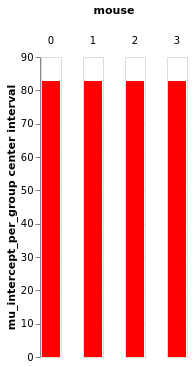

In [225]:
posterior_intercept=alt.Chart(full_data_with_posterior).mark_bar(color='red').encode(
#x='dummy_x',
y='mu_intercept_per_group center interval')
posterior_intercept.facet(column='mouse')

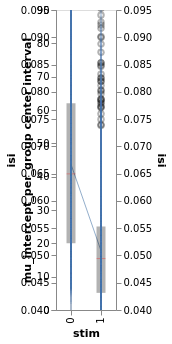

In [226]:
(self.data_box_detail(data=full_data_with_posterior,autofacet=False)+posterior_intercept).resolve_scale(y='independent')

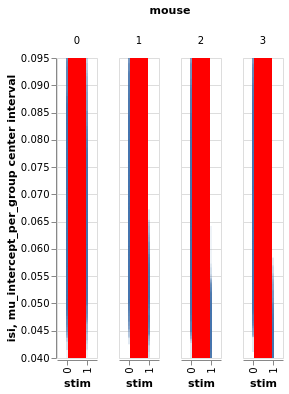

In [227]:
(self.chart_data_detail+posterior_intercept).facet(column='mouse')

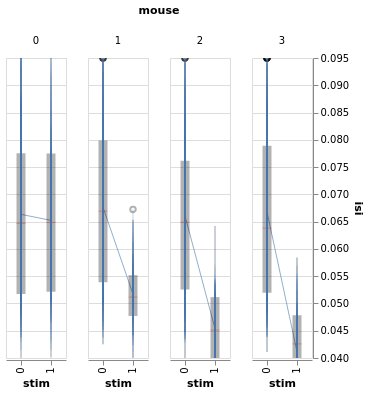

In [207]:
(self.data_box_detail(data=full_data_with_posterior,autofacet=False)+posterior_intercept).facet(column='mouse')

In [31]:
from bayes_window.utils import fill_row
df_data = self.data_and_posterior
df_bayes=self.data
posterior_index_name='combined_condition'
data=pd.concat([fill_row(group_val, data_rows, df_bayes, posterior_index_name)
                  for group_val, data_rows in df_data.groupby([posterior_index_name])])

Index(['sigma_slope_per_condition higher interval',
       'sigma_slope_per_condition lower interval',
       'sigma_slope_per_condition center interval'],
      dtype='object')

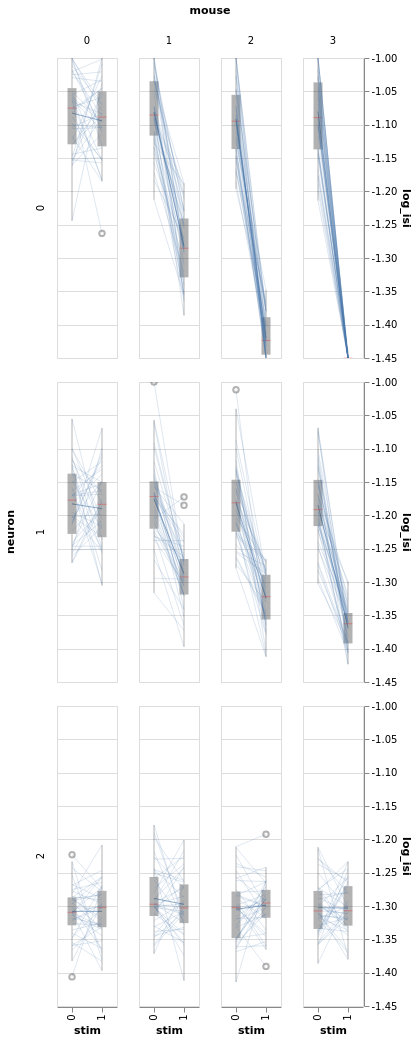

In [33]:
self.chart_data_box_detail+

TODO fill in original conditions something like this:

In [56]:
data

,neuron,mouse,i_trial,combined_condition,mu_intercept_per_group higher interval,mu_intercept_per_group lower interval,mu_intercept_per_group center interval,sigma_intercept_per_group higher interval,sigma_intercept_per_group lower interval,sigma_intercept_per_group center interval,sigma_obs higher interval,sigma_obs lower interval,sigma_obs center interval,sigma_slope_per_condition higher interval,sigma_slope_per_condition lower interval,sigma_slope_per_condition center interval,higher interval,lower interval,center interval,log_isi diff
0,0,m3bayes,0,0,170.266983,0.026667,0.465664,0.000075,2.544681e-08,7.815179e-07,0.887038,0.815871,0.852388,0.053503,0.003173,0.012076,-15.140471,-168.775009,-51.574540,-0.044732
1,0,m3bayes,1,0,170.266983,0.026667,0.465664,0.000075,2.544681e-08,7.815179e-07,0.887038,0.815871,0.852388,0.053503,0.003173,0.012076,-15.140471,-168.775009,-51.574540,-0.054306
2,0,m3bayes,2,0,170.266983,0.026667,0.465664,0.000075,2.544681e-08,7.815179e-07,0.887038,0.815871,0.852388,0.053503,0.003173,0.012076,-15.140471,-168.775009,-51.574540,0.030998
3,0,m3bayes,3,0,170.266983,0.026667,0.465664,0.000075,2.544681e-08,7.815179e-07,0.887038,0.815871,0.852388,0.053503,0.003173,0.012076,-15.140471,-168.775009,-51.574540,-0.087558
4,0,m3bayes,4,0,170.266983,0.026667,0.465664,0.000075,2.544681e-08,7.815179e-07,0.887038,0.815871,0.852388,0.053503,0.003173,0.012076,-15.140471,-168.775009,-51.574540,0.002159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2,m3bayes,35,2,167.643463,0.111655,0.413160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.809680,-166.367218,-52.261018,0.048291
476,2,m3bayes,36,2,167.643463,0.111655,0.413160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.809680,-166.367218,-52.261018,0.011576
477,2,m3bayes,37,2,167.643463,0.111655,0.413160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.809680,-166.367218,-52.261018,-0.036698
478,2,m3bayes,38,2,167.643463,0.111655,0.413160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.809680,-166.367218,-52.261018,0.043141


In [46]:
df_result=data
if ('combined_condition' in self.original_data.columns) and ('combined_condition' in df_result.columns):
    levels_to_replace = list(set(self.levels) - {self.treatment})
    for level_values, data_subset in self.original_data.groupby(levels_to_replace):
        if not hasattr(level_values, '__len__'):  # This level is a scalar
            level_values = [level_values]
        for level_name, level_value in zip(levels_to_replace, level_values):
            df_result.loc[df_result['combined_condition'] == data_subset['combined_condition'].iloc[0],
                          level_name] = level_value        # sanity check:


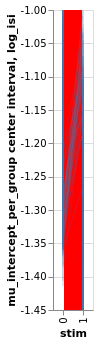

In [76]:
posterior_intercept=alt.Chart(self.data_and_posterior).mark_bar(color='red').encode(
#x='dummy_x',
y='mu_intercept_per_group center interval')


(posterior_intercept+ self.chart_data_detail)#.facet(column=self.group)

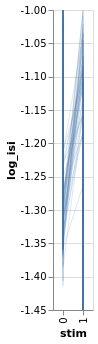

In [55]:
self.data_box_detail(data=self.data_and_posterior)

# data_details

In [5]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

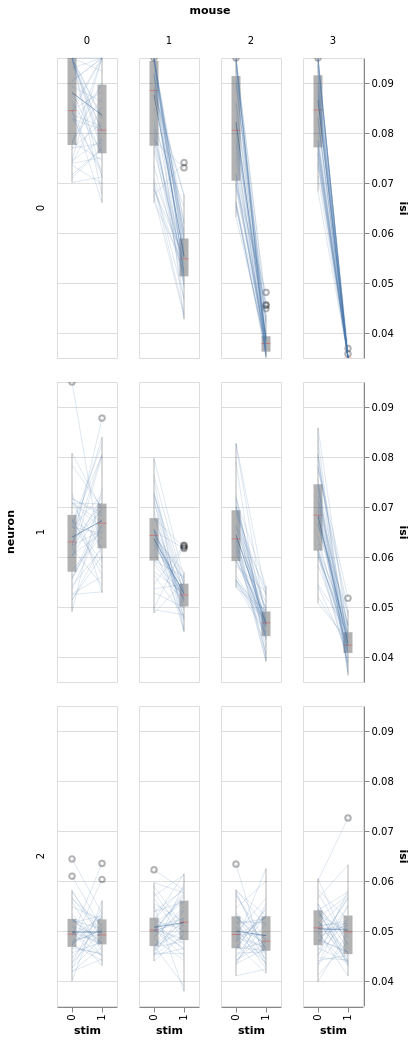

In [6]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

In [3]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart_posterior


We lost some detail in the data. This does not matter for posterior, but plotting data may suffer. Did was there another index column (like i_trial) other than ['neuron_x_mouse', 'mouse']?


No warning should be displayed below:

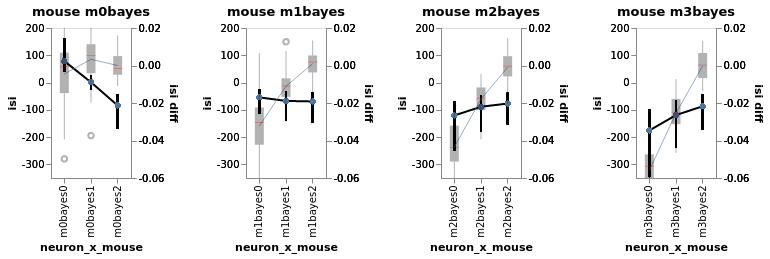

In [4]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart_posterior


# data_details

In [5]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

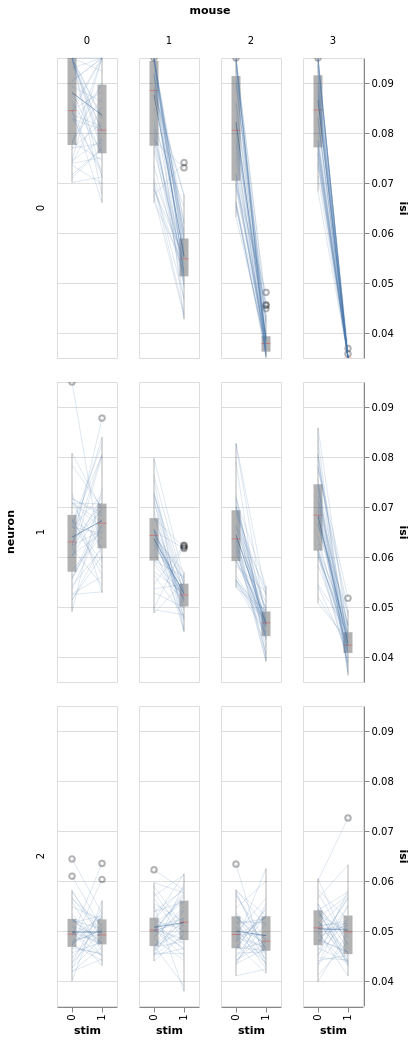

In [6]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

## Without detail:

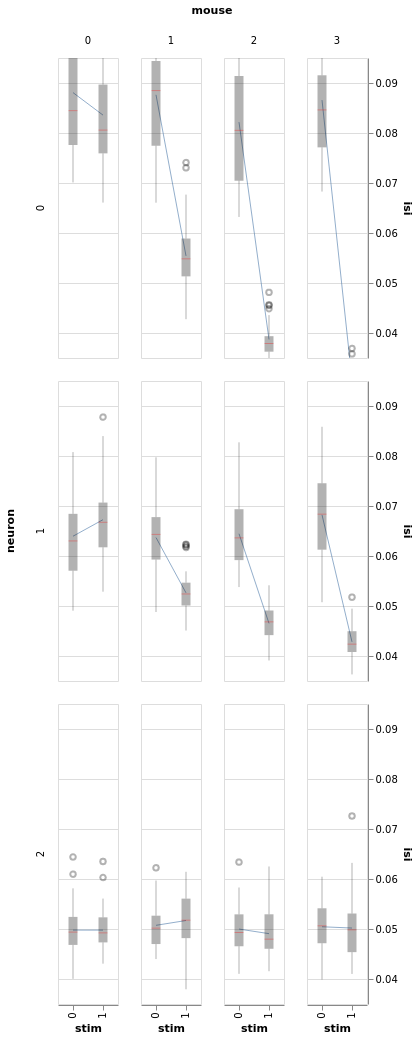

In [7]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_posterior_charts

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O',column='mouse')

In [ ]:
bw.chart_posterior

## More manual faceting and composing

In [14]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O')

n(Divergences) = 5


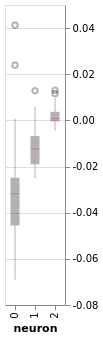

In [15]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

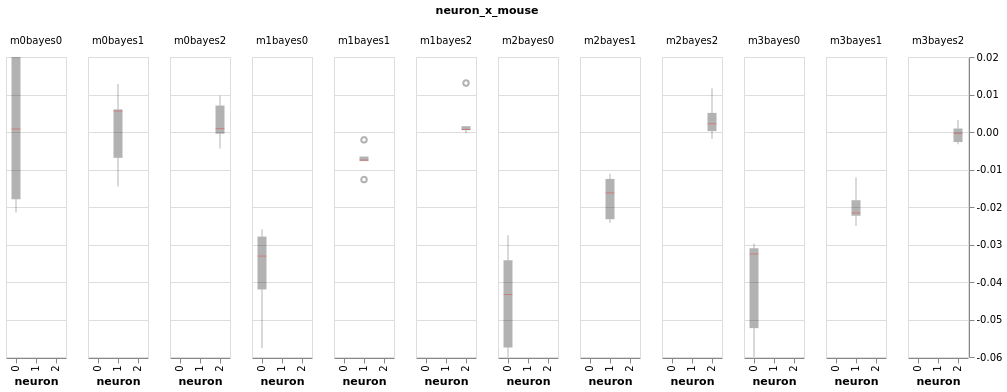

In [16]:
bw.chart_data_boxplot.facet(column='neuron_x_mouse')

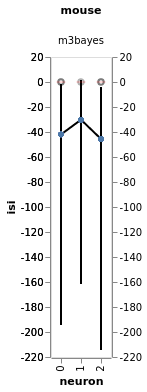

In [17]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse')

Fix:

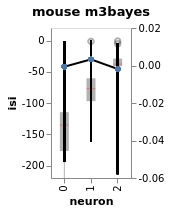

In [18]:
from bayes_window.visualization import facet
facet(alt.layer(bw.chart_data_boxplot,bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

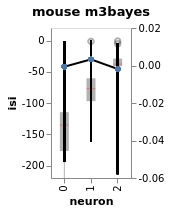

In [19]:
facet((bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [20]:
#bw.facet(bw,column='mouse_code')

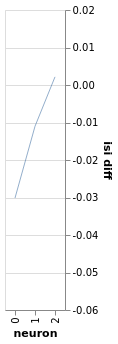

In [21]:
bw.charts[2]

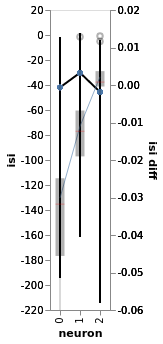

In [22]:
alt.layer(*bw.charts).resolve_scale(y='independent')

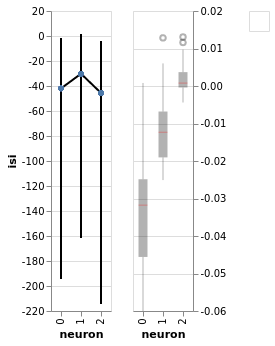

In [23]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

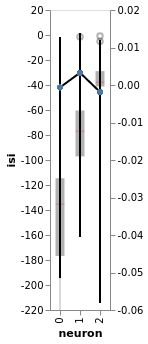

In [24]:
(bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent')

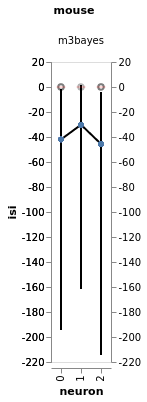

In [25]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse').resolve_scale(y='independent')

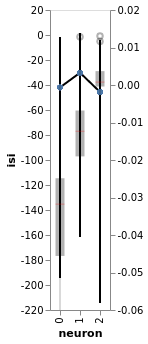

In [26]:
alt.layer(bw.chart_posterior,bw.chart_data_boxplot).resolve_scale(y='independent')

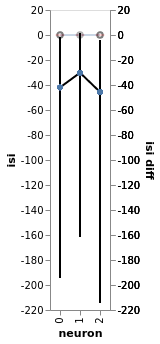

In [27]:
bw.plot(x='neuron:O')

In [28]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.create_posterior_charts()

n(Divergences) = 9
We lost some detail in the data. This does not matter for posterior, but plotting data may suffer. Did was there another index column (like i_trial) other than ['neuron', 'mouse']?


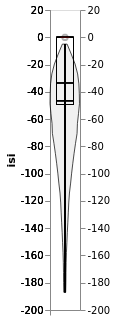

In [29]:
alt.layer(*bw.charts)

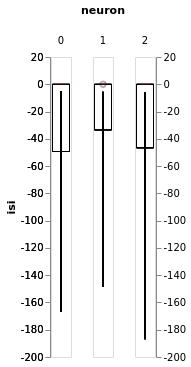

In [30]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

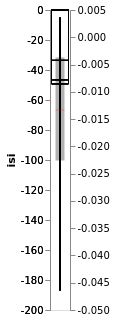

In [31]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

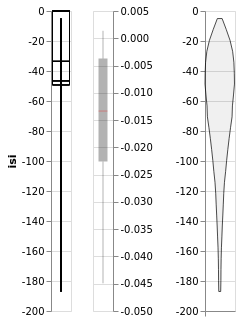

In [32]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

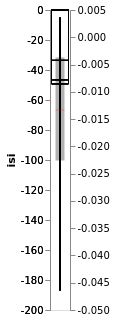

In [33]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

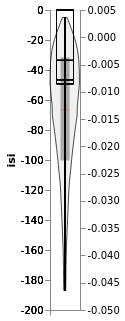

In [34]:
(bw.chart_posterior+bw.chart_data_boxplot+bw.chart_posterior_kde).resolve_scale(y='independent')

In [35]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


In [36]:
bw.create_posterior_charts(x='neuron:O')

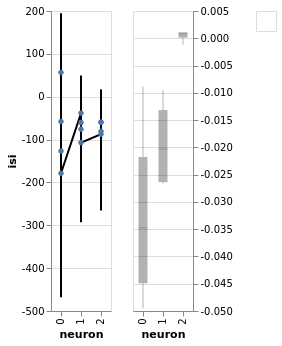

In [37]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

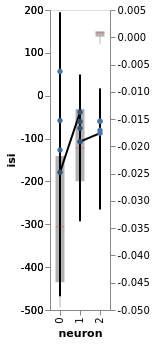

In [38]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

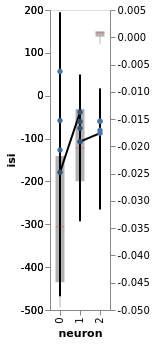

In [39]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

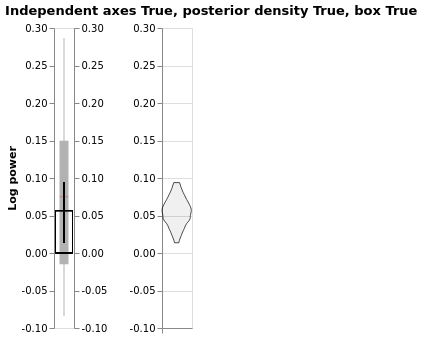

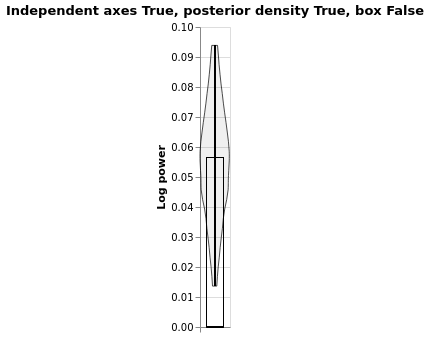

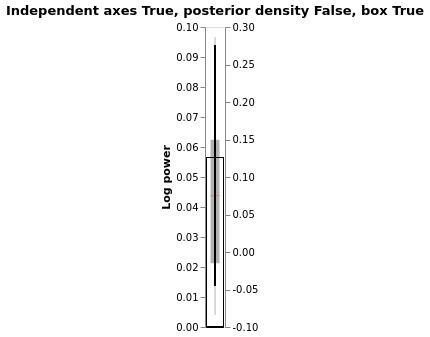

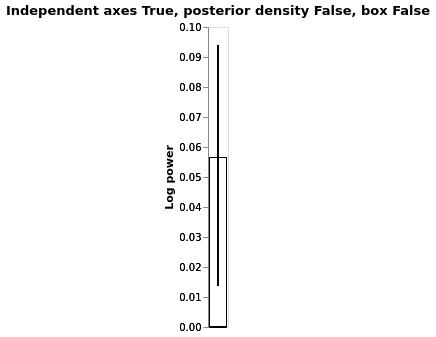

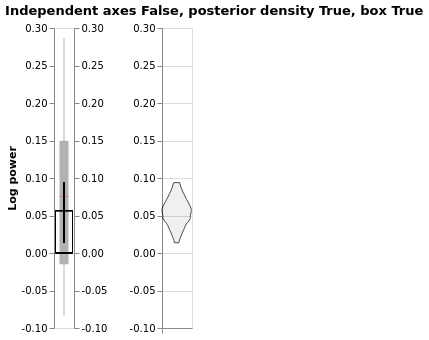

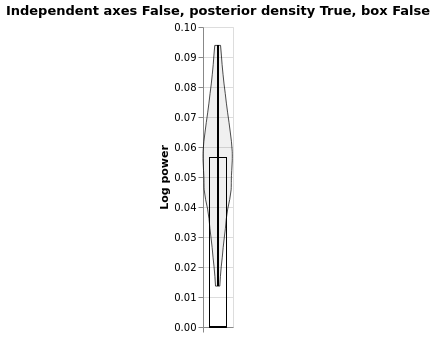

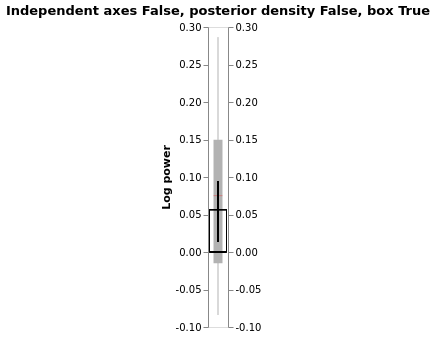

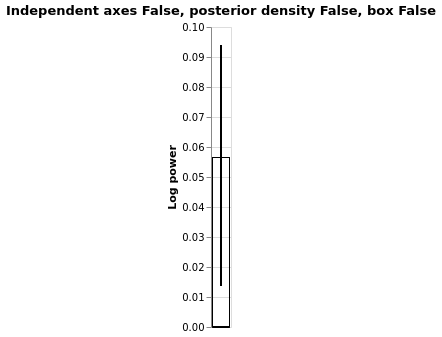

In [42]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
                add_posterior_density=ap,add_box=ab
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()